In [1]:
import pandas as pd
import numpy as np
from scipy import stats

In [2]:
from matplotlib.pyplot import MultipleLocator
import matplotlib.pyplot as plt
import seaborn as sns  #画密度图
from matplotlib.ticker import MaxNLocator, FuncFormatter, MultipleLocator
import matplotlib.ticker as ticker
import palettable #python颜色库

In [3]:
type_colors = {'all':'k','main':'#fc8d62','asso':'#66c2a5','new':'grey'}

In [4]:
key_data = pd.read_csv('Key_Data.csv')

In [5]:
key_data.head(5)

,index_i,mentee_id,mentor_id,community,paper_num_mte,paper_num_mto,paper_ratio_mte,paper_ratio_mto,credit_mte,credit_mto,...,total_cits_mte,total_cits_mto,total_cits5_mte,total_cits5_mto,cits_mte,cits_mto,cits5_mte,cits5_mto,birthYear_mte,birthYear_mto
0,0,A1964335128,A177689540,5.0,0,26,0.000000,1.0,0.000000,96.139683,...,7237.0,21415.0,4403.0,5485.0,0.0,1996.0,0.0,673.0,2004,1956
1,0,A1964335128,A177689540,3.0,0,42,0.000000,1.0,0.000000,150.796825,...,7237.0,21415.0,4403.0,5485.0,0.0,1276.0,0.0,264.0,2004,1956
2,0,A1964335128,A177689540,6.0,25,0,1.000000,0.0,523.366667,0.000000,...,7237.0,21415.0,4403.0,5485.0,4163.0,0.0,2469.0,0.0,2004,1956
3,0,A1964335128,A177689540,1.0,0,62,0.000000,1.0,0.000000,175.473810,...,7237.0,21415.0,4403.0,5485.0,0.0,5142.0,0.0,806.0,2004,1956
4,0,A1964335128,A177689540,0.0,8,107,0.074766,1.0,132.846429,724.462374,...,7237.0,21415.0,4403.0,5485.0,1817.0,8735.0,795.0,2880.0,2004,1956


In [6]:
key_data.columns

Index(['index_i', 'mentee_id', 'mentor_id', 'community', 'paper_num_mte',
       'paper_num_mto', 'paper_ratio_mte', 'paper_ratio_mto', 'credit_mte',
       'credit_mto', 'communitys_paper_num_mto', 'communitys_paper_num_mte',
       'total_credit_mte', 'total_credit_mto', 'type', 'total_cits_mte',
       'total_cits_mto', 'total_cits5_mte', 'total_cits5_mto', 'cits_mte',
       'cits_mto', 'cits5_mte', 'cits5_mto', 'birthYear_mte', 'birthYear_mto'],
      dtype='object')

In [7]:
V0 = pd.read_csv('regression_variables.csv')
V0.columns

Index(['mentee_id', 'mentor_id', 'communitys_paper_num_mte', 'total_cits5_mte',
       'total_credit_mte', 'birthYear_mte', 'communitys_paper_num_mto',
       'total_cits5_mto', 'career_len_mte', 'career_len_mto',
       'yearly_cits5_mto', 'topic_num10_mte', 'topic_num10_mto',
       'total_papers_mte', 'total_papers_mto', 'colla_work_count',
       'colla_work_count_first5', 'colla_work_count_later5',
       'collaborators_mte_count', 'common_cllaborators_count',
       'ratio_common_collaborators', 'mte_work_first5_count'],
      dtype='object')

In [8]:
print(len(V0))
thd = 1990
V2000 = V0['mentee_id'][V0.birthYear_mte<=thd]
key_data = key_data[(key_data.paper_num_mte>0)&(key_data.mentee_id.isin(V2000))]

49628


### mean papers ratio

#### All

In [9]:
key_data = pd.read_csv('Key_Data.csv')

In [10]:
key_data['paper_ratio_mte'] = key_data['paper_num_mte']/key_data['communitys_paper_num_mte']

In [11]:
key_data = key_data[(key_data.paper_num_mte>0)&(key_data.mentee_id.isin(V2000))]

In [12]:
target_info = key_data[['mentee_id','mentor_id','community','type','paper_ratio_mte','paper_num_mte','communitys_paper_num_mte']][key_data.paper_num_mte>0]

In [13]:
def type_count(tp_df):
    num_new = len(tp_df[tp_df.type=='new'])
    
    return num_new

num_new = target_info.groupby(['mentee_id','mentor_id']).apply(type_count).reset_index(name='num_new')

In [14]:
mentee_with_new = list(set(num_new['mentee_id'][num_new.num_new>0]))
mentee_without_new = list(set(num_new['mentee_id'][num_new.num_new==0]))

In [15]:
def paper_contri(tp_df):
    contri_main = np.sum(tp_df['paper_ratio_mte'][tp_df.type=='main'])
    contri_asso = np.sum(tp_df['paper_ratio_mte'][tp_df.type=='associate'])
    contri_new = np.sum(tp_df['paper_ratio_mte'][tp_df.type=='new'])
    
    return contri_main,contri_asso,contri_new

In [16]:
paper_contri_ratio = target_info.groupby(['mentee_id','mentor_id']).apply(paper_contri).reset_index(name='paper_contri_ratio')

In [17]:
df_list = []
tp_array = paper_contri_ratio.values
for k in tp_array:
    tp_k = [k[0],k[1]]
    tp_k.extend(list(k[2]))
    df_list.append(tp_k)

In [18]:
paper_contri_ratio = pd.DataFrame(df_list,columns=['mentee_id','mentor_id','main','asso','new'])
paper_contri_ratio['total_contri'] = paper_contri_ratio['main'] + paper_contri_ratio['asso'] + paper_contri_ratio['new']

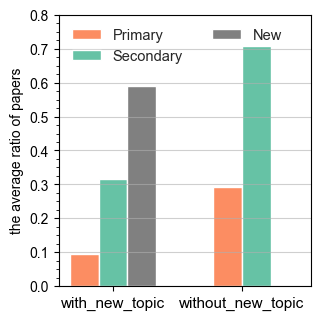

In [19]:
#with_new
data_with_new = paper_contri_ratio[(paper_contri_ratio['mentee_id'].isin(mentee_with_new))&(paper_contri_ratio.new<1)&(paper_contri_ratio.new>0)]

#without_new
data_without_new = paper_contri_ratio[(paper_contri_ratio['mentee_id'].isin(mentee_without_new))&(paper_contri_ratio.new==0)]

data_tp = data_with_new
mean_main_with_new = np.mean(data_tp['main'])
mean_asso_with_new = np.mean(data_tp['asso'])
mean_new_with_new = np.mean(data_tp['new'])

data_tp = data_without_new
mean_main_without_new = np.mean(data_tp['main'])
mean_asso_without_new = np.mean(data_tp['asso'])
mean_new_without_new = np.mean(data_tp['new'])


classes = ['with_new_topic','without_new_topic']
width = 0.3  # the width of the bars: can also be len(x) sequence

#figure layout set
fig, ax = plt.subplots(1,1,constrained_layout=True,figsize=[0.618*5,0.618*5])
sns.set(style='ticks',font_scale=1.2, font='Arial')

#plot
x_main = np.array([1,1+5*width])
ax.bar(x_main, [mean_main_with_new,mean_main_without_new], width,color=type_colors['main'],label='Primary')

x_associate = np.array([1+width,1+6*width])
ax.bar(x_associate, [mean_asso_with_new,mean_asso_without_new], width,color=type_colors['asso'],label='Secondary')

x_new = np.array([1+2*width,1+7*width])
ax.bar(x_new, [mean_new_with_new,mean_new_without_new], width,color=type_colors['new'],label='New')

#fig ticks set
ax.legend(frameon=0,ncol=2,loc='upper left',fontsize=10.5)
ax.set_ylabel('the average ratio of papers')
ax.set_xticks([1+width,1+5.5*width], classes,fontsize=11)

ax.set_ylim([0,0.8])
ax.yaxis.set_major_locator(MultipleLocator(0.1))
ax.yaxis.set_minor_locator(MultipleLocator(0.025))
plt.grid(axis='y',alpha=0.6)

# ax.set_title(f'All')
# fig.savefig('result_data_plot/new_plot(202403)/All (the average ratio of papers).pdf')
plt.show()

#### High impact

In [20]:
q10,q25,q50,q75,q95 = key_data[['mentee_id','total_cits5_mte']].drop_duplicates()['total_cits5_mte'].quantile([.1,.25,.5,.75,.95])

In [21]:
elites = key_data[['mentee_id','mentor_id']][key_data.total_cits5_mte>=q75].drop_duplicates().values[:,0]

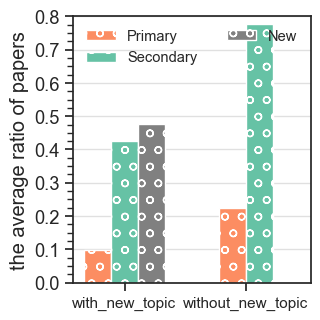

In [22]:
#with_new
data_with_new = paper_contri_ratio[(paper_contri_ratio['mentee_id'].isin(mentee_with_new))&(paper_contri_ratio.new<1)
                                  &(paper_contri_ratio['mentee_id'].isin(elites))]

#without_new
data_without_new = paper_contri_ratio[(paper_contri_ratio['mentee_id'].isin(mentee_without_new))&(paper_contri_ratio.new==0)
                                     &(paper_contri_ratio['mentee_id'].isin(elites))]
data_tp = data_with_new
mean_main_with_new = np.mean(data_tp['main'])
mean_asso_with_new = np.mean(data_tp['asso'])
mean_new_with_new = np.mean(data_tp['new'])

data_tp = data_without_new
mean_main_without_new = np.mean(data_tp['main'])
mean_asso_without_new = np.mean(data_tp['asso'])
mean_new_without_new = np.mean(data_tp['new'])

classes = ['with_new_topic','without_new_topic']
width = 0.3  # the width of the bars: can also be len(x) sequence

#figure layout set
fig, ax = plt.subplots(1,1,constrained_layout=True,figsize=[0.618*5,0.618*5])
sns.set(style='ticks',font_scale=1.2, font='Arial')

#plot
x_main = np.array([1,1+5*width])
ax.bar(x_main, [mean_main_with_new,mean_main_without_new], width,color=type_colors['main'],label='Primary',hatch='o')

x_associate = np.array([1+width,1+6*width])
ax.bar(x_associate, [mean_asso_with_new,mean_asso_without_new], width,color=type_colors['asso'],label='Secondary',hatch='o')

x_new = np.array([1+2*width,1+7*width])
ax.bar(x_new, [mean_new_with_new,mean_new_without_new], width,color=type_colors['new'],label='New',hatch='o')

#fig ticks set
ax.legend(frameon=0,ncol=2,loc='upper left',fontsize=10.5)
ax.set_ylim([0,0.8])
ax.yaxis.set_major_locator(MultipleLocator(0.1))
ax.yaxis.set_minor_locator(MultipleLocator(0.025))
plt.grid(axis='y',alpha=0.6)
ax.set_ylabel('the average ratio of papers')
ax.set_xticks([1+width,1+5.5*width], classes,fontsize=11)
# ax.set_title(f'ALL (ratio of with_new = {round(ratio_with_new,2)})')
# fig.savefig('result_data_plot/new_plot(202403)/High-impact (the average ratio of papers).pdf')
plt.show()

### mean credit ratio

In [23]:
target_info = key_data[['mentee_id','mentor_id','community','type','credit_mte','total_credit_mte']]

In [24]:
def type_count(tp_df):
    num_new = len(tp_df[tp_df.type=='new'])
    
    return num_new

num_new = target_info.groupby(['mentee_id','mentor_id']).apply(type_count).reset_index(name='num_new')

In [25]:
num_new.head(5)

,mentee_id,mentor_id,num_new
0,A1002422011,A1897971127,0
1,A1002422011,A1966502692,0
2,A100328954,A1993268291,3
3,A100328954,A2157074446,1
4,A100328954,A2780364925,3


In [26]:
mentee_with_new = list(set(num_new['mentee_id'][num_new.num_new>0]))
mentee_without_new = list(set(num_new['mentee_id'][num_new.num_new==0]))

In [27]:
target_info.head(5)

,mentee_id,mentor_id,community,type,credit_mte,total_credit_mte
14,A2141337483,A328693186,0.0,main,3.583333,50.217857
16,A2141337483,A328693186,4.0,new,46.491667,50.217857
17,A2141337483,A328693186,3.0,associate,0.142857,50.217857
22,A3010849663,A240727783,5.0,associate,28.870976,319.504685
23,A3010849663,A240727783,2.0,main,263.146340,319.504685


In [28]:
credit_ratio_mte = list(target_info['credit_mte']/target_info['total_credit_mte'])
target_info.loc[:,'credit_ratio_mte'] = credit_ratio_mte

/var/folders/8n/d3_ymw7s7tn0tz9t554ghv5m0000gn/T/ipykernel_49978/3392810383.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_info.loc[:,'credit_ratio_mte'] = credit_ratio_mte


In [29]:
def topic_contri(tp_df):
    contri_main = np.sum(tp_df['credit_ratio_mte'][tp_df.type=='main'])
    contri_asso = np.sum(tp_df['credit_ratio_mte'][tp_df.type=='associate'])
    contri_new = np.sum(tp_df['credit_ratio_mte'][tp_df.type=='new'])
    
    return contri_main,contri_asso,contri_new

In [30]:
topic_contri_ratio = target_info.groupby(['mentee_id','mentor_id']).apply(topic_contri).reset_index(name='topic_contri_ratio')

In [31]:
df_list = []
tp_array = topic_contri_ratio.values
for k in tp_array:
    tp_k = [k[0],k[1]]
    tp_k.extend(list(k[2]))
    df_list.append(tp_k)

In [32]:
topic_contri_ratio = pd.DataFrame(df_list,columns=['mentee_id','mentor_id','main','asso','new'])

In [33]:
topic_contri_ratio.head(5)

,mentee_id,mentor_id,main,asso,new
0,A1002422011,A1897971127,0.606829,0.393171,0.000000
1,A1002422011,A1966502692,0.017778,0.982222,0.000000
2,A100328954,A1993268291,0.000000,0.019098,0.980902
3,A100328954,A2157074446,0.032510,0.960938,0.006551
4,A100328954,A2780364925,0.000000,0.018798,0.981202


In [34]:
q10,q25,q50,q75,q95 = key_data[['mentee_id','total_cits5_mte']].drop_duplicates()['total_cits5_mte'].quantile([.1,.25,.5,.75,.95])
elites = key_data[['mentee_id','mentor_id']][key_data.total_cits5_mte>=q75].drop_duplicates().values[:,0]

In [35]:
#with_new
data_with_new = topic_contri_ratio[(topic_contri_ratio['mentee_id'].isin(mentee_with_new))&(topic_contri_ratio.new<1)
                                  &(~topic_contri_ratio['mentee_id'].isin(elites))]

#without_new
data_without_new = topic_contri_ratio[(topic_contri_ratio['mentee_id'].isin(mentee_without_new))&(topic_contri_ratio.new==0)
                                     &(~topic_contri_ratio['mentee_id'].isin(elites))]
data_tp = data_with_new
mean_main_with_new = np.mean(data_tp['main'])
mean_asso_with_new = np.mean(data_tp['asso'])
mean_new_with_new = np.mean(data_tp['new'])

error_main_with_new = stats.sem(data_tp['main'])
error_asso_with_new = stats.sem(data_tp['asso'])
error_new_with_new = stats.sem(data_tp['new'])

data_tp = data_without_new
mean_main_without_new = np.mean(data_tp['main'])
mean_asso_without_new = np.mean(data_tp['asso'])
mean_new_without_new = np.mean(data_tp['new'])

error_main_without_new = stats.sem(data_tp['main'])
error_asso_without_new = stats.sem(data_tp['asso'])
error_new_without_new = stats.sem(data_tp['new'])

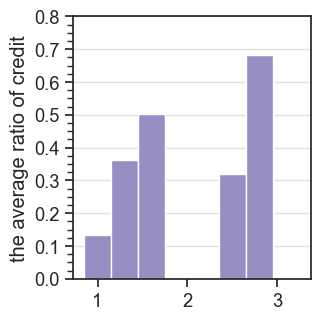

In [36]:
classes = ['with_new_topic','without_new_topic']
width = 0.3  # the width of the bars: can also be len(x) sequence

#figure layout set
fig, ax = plt.subplots(1,1,constrained_layout=True,figsize=[0.618*5,0.618*5])
sns.set(style='ticks',font_scale=1.2, font='Arial')

# #plot
# x_main = np.array([1,1+5*width])
# ax.bar(x_main, [mean_main_with_new,mean_main_without_new], width,color=type_colors['main'],label='Primary')

# x_associate = np.array([1+width,1+6*width])
# ax.bar(x_associate, [mean_asso_with_new,mean_asso_without_new], width,color=type_colors['asso'],label='Secondary')

# x_new = np.array([1+2*width,1+7*width])
# ax.bar(x_new, [mean_new_with_new,mean_new_without_new], width,color=type_colors['new'],label='New')

#plot

x_with_new_topic = np.array([1,1+1*width,1+2*width])
ax.bar(x_with_new_topic, [mean_main_with_new,mean_asso_with_new,mean_new_with_new], width,color='#998ec3',label='with_new_topic')

x_without_new_topic = np.array([1+5*width,1+6*width,1+7*width])
ax.bar(x_without_new_topic , [mean_main_without_new,mean_asso_without_new,mean_new_without_new], width,color='#998ec3',label='without_new_topic')


#fig ticks set
# ax.legend(frameon=0,ncol=2,loc='upper left',fontsize=10.5)
ax.set_ylim([0,0.8])
ax.yaxis.set_major_locator(MultipleLocator(0.1))
ax.yaxis.set_minor_locator(MultipleLocator(0.025))
plt.grid(axis='y',alpha=0.6)
ax.set_ylabel('the average ratio of credit')
# ax.set_xticks([1+width,1+5.5*width], classes,fontsize=11)
# ax.set_title(f'All')
# fig.savefig('result_data_plot/new_plot(202403)/All (the average ratio of credit0522).pdf')
plt.show()

#### High impact

In [37]:
q10,q25,q50,q75,q95 = key_data[['mentee_id','total_cits5_mte']].drop_duplicates()['total_cits5_mte'].quantile([.1,.25,.5,.75,.95])
elites = key_data[['mentee_id','mentor_id']][key_data.total_cits5_mte>=q75].drop_duplicates().values[:,0]

In [38]:
#with_new
data_with_new = topic_contri_ratio[(topic_contri_ratio['mentee_id'].isin(mentee_with_new))&(topic_contri_ratio.new<1)
                                  &(topic_contri_ratio['mentee_id'].isin(elites))]

#without_new
data_without_new = topic_contri_ratio[(topic_contri_ratio['mentee_id'].isin(mentee_without_new))&(topic_contri_ratio.new==0)
                                     &(topic_contri_ratio['mentee_id'].isin(elites))]

In [39]:
data_tp = data_with_new
mean_main_with_new_Elite = np.mean(data_tp['main'])
mean_asso_with_new_Elite = np.mean(data_tp['asso'])
mean_new_with_new_Elite = np.mean(data_tp['new'])

error_main_with_new_Elite = stats.sem(data_tp['main'])
error_asso_with_new_Elite = stats.sem(data_tp['asso'])
error_new_with_new_Elite = stats.sem(data_tp['new'])

data_tp = data_without_new
mean_main_without_new_Elite = np.mean(data_tp['main'])
mean_asso_without_new_Elite = np.mean(data_tp['asso'])
mean_new_without_new_Elite = np.mean(data_tp['new'])

error_main_without_new_Elite = stats.sem(data_tp['main'])
error_asso_without_new_Elite = stats.sem(data_tp['asso'])
error_new_without_new_Elite = stats.sem(data_tp['new'])

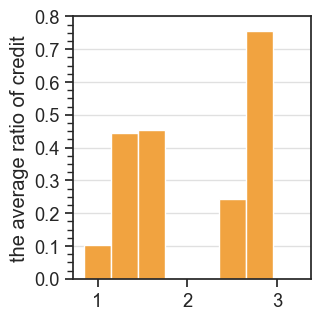

In [40]:
classes = ['with_new_topic','without_new_topic']
width = 0.3  # the width of the bars: can also be len(x) sequence

#figure layout set
fig, ax = plt.subplots(1,1,constrained_layout=True,figsize=[0.618*5,0.618*5])
sns.set(style='ticks',font_scale=1.2, font='Arial')

#plot
# x_main = np.array([1,1+5*width])
# ax.bar(x_main, [mean_main_with_new,mean_main_without_new], width,color=type_colors['main'],label='Primary',hatch='o')

# x_associate = np.array([1+width,1+6*width])
# ax.bar(x_associate, [mean_asso_with_new,mean_asso_without_new], width,color=type_colors['asso'],label='Secondary',hatch='o')

# x_new = np.array([1+2*width,1+7*width])
# ax.bar(x_new, [mean_new_with_new,mean_new_without_new], width,color=type_colors['new'],label='New',hatch='o')

#plot

x_with_new_topic = np.array([1,1+1*width,1+2*width])
ax.bar(x_with_new_topic, [mean_main_with_new_Elite,mean_asso_with_new_Elite,mean_new_with_new_Elite], width,color='#f1a340',label='with_new_topic')

x_without_new_topic = np.array([1+5*width,1+6*width,1+7*width])
ax.bar(x_without_new_topic , [mean_main_without_new_Elite,mean_asso_without_new_Elite,mean_new_without_new_Elite], width,color='#f1a340',label='without_new_topic')


#fig ticks set
# ax.legend(frameon=0,ncol=2,loc='upper left',fontsize=10.5)
ax.set_ylim([0,0.8])
ax.yaxis.set_major_locator(MultipleLocator(0.1))
ax.yaxis.set_minor_locator(MultipleLocator(0.025))
plt.grid(axis='y',alpha=0.6)
ax.set_ylabel('the average ratio of credit')
# ax.set_xticks([1+width,1+5.5*width], classes,fontsize=11)
fig.savefig('result_data_plot/new_plot(202403)/High-impact (the average ratio of cits0522).pdf')
plt.show()

#### Merge Plot

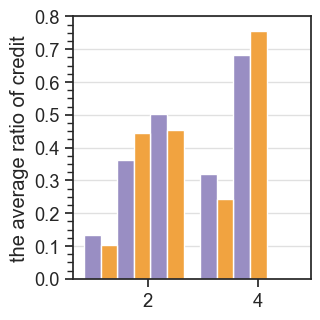

In [41]:
width = 0.3  # the width of the bars: can also be len(x) sequence

#figure layout set
fig, ax = plt.subplots(1,1,constrained_layout=True,figsize=[0.618*5,0.618*5])
sns.set(style='ticks',font_scale=1.2, font='Arial')

#plot
# All with new topic
x_with_new_topic = np.array([1,1+2*width,1+4*width])
ax.bar(x_with_new_topic, [mean_main_with_new,mean_asso_with_new,mean_new_with_new], width,color='#998ec3',label='with_new_topic')

#Elite with new topic
x_with_new_topic = np.array([1+1*width,1+3*width,1+5*width])
ax.bar(x_with_new_topic, [mean_main_with_new_Elite,mean_asso_with_new_Elite,mean_new_with_new_Elite], width,color='#f1a340',label='with_new_topic')

# All without new topic
x_without_new_topic = np.array([1+7*width,1+9*width,1+11*width])
ax.bar(x_without_new_topic , [mean_main_without_new,mean_asso_without_new,mean_new_without_new], width,color='#998ec3',label='without_new_topic')

#Elite without new topic
x_without_new_topic = np.array([1+8*width,1+10*width,1+12*width])
ax.bar(x_without_new_topic , [mean_main_without_new_Elite,mean_asso_without_new_Elite,mean_new_without_new_Elite], width,color='#f1a340',label='without_new_topic')

#fig ticks set
# ax.legend(frameon=0,ncol=2,loc='upper left',fontsize=10.5)
ax.set_ylim([0,0.8])
ax.yaxis.set_major_locator(MultipleLocator(0.1))
ax.yaxis.set_minor_locator(MultipleLocator(0.025))
plt.grid(axis='y',alpha=0.6)
ax.set_ylabel('the average ratio of credit')
# ax.set_xticks([1+width,1+5.5*width], classes,fontsize=11)
# fig.savefig('result_data_plot/new_plot(202403)/High-impact (the average ratio of cits0522).pdf')
plt.show()

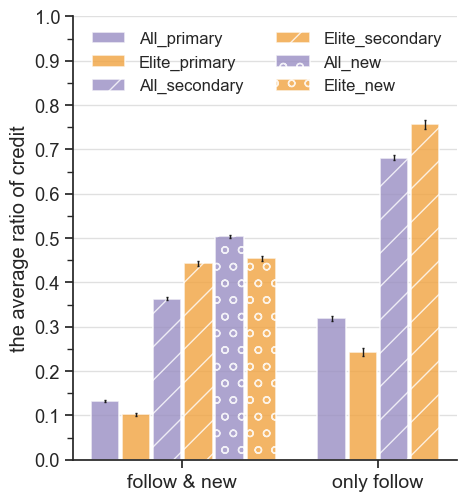

In [64]:
# classes = ['with_new_topic','without_new_topic']
classes = ['follow & new','only follow']
width = 0.3  # the width of the bars: can also be len(x) sequence
error_kw = {'ecolor': 'k', 'elinewidth': 1, 'capsize': 1, 'capthick': 1}

#figure layout set
fig, ax = plt.subplots(1,1,constrained_layout=True,figsize=[0.65*7,0.7*7])
sns.set(style='ticks',font_scale=1.2, font='Arial')

#plot
# mean_main_with_new
x = 1
ax.bar(x, mean_main_with_new, width,color='#998ec3',fill=1,yerr=error_main_with_new,error_kw = error_kw,
      label='All_primary',lw=1.2,alpha=0.8)

# mean_main_with_new_Elite
x = 1+1*width+0.03
ax.bar(x, mean_main_with_new_Elite, width,color='#f1a340',fill=1,yerr=error_main_with_new_Elite,error_kw = error_kw,
      label='Elite_primary',lw=1.2,alpha=0.8)

# mean_asso_with_new
x = 1+2*width+0.06
ax.bar(x, mean_asso_with_new, width,color='#998ec3',hatch='/',fill=1,yerr=error_asso_with_new,error_kw = error_kw,
      label='All_secondary',lw=1.2,alpha=0.8)

# mean_asso_with_new_Elite
x = 1+3*width+0.09
ax.bar(x, mean_asso_with_new_Elite, width,color='#f1a340',hatch='/',fill=1,yerr=error_asso_with_new_Elite,error_kw = error_kw,
      label='Elite_secondary',lw=1.2,alpha=0.8)

# mean_new_with_new
x = 1+4*width+0.12
ax.bar(x, mean_new_with_new, width,color='#998ec3',hatch='o',fill=1,yerr=error_new_with_new,error_kw = error_kw,
      label='All_new',lw=1.2,alpha=0.8)

# mean_asso_with_new_Elite
x = 1+5*width+0.16
ax.bar(x, mean_new_with_new_Elite, width,color='#f1a340',hatch='o',fill=1,yerr=error_new_with_new_Elite,error_kw = error_kw,
      label='Elite_new',lw=1.2,alpha=0.8)


# mean_main_without_new
x = 1+8*width
ax.bar(x, mean_main_without_new, width,color='#998ec3',fill=1,yerr=error_main_without_new,error_kw = error_kw,
      lw=1.2,alpha=0.8)

# mean_main_without_new_Elite
x = 1+9*width+0.03
ax.bar(x, mean_main_without_new_Elite, width,color='#f1a340',fill=1,yerr=error_main_without_new_Elite,error_kw = error_kw,
      lw=1.2,alpha=0.8)

# mean_asso_without_new
x = 1+10*width+0.06
ax.bar(x, mean_asso_without_new, width,color='#998ec3',hatch='/',fill=1,yerr=error_asso_without_new,error_kw = error_kw,
      lw=1.2,alpha=0.8)

# mean_asso_without_new_Elite
x = 1+11*width+0.09
ax.bar(x, mean_asso_without_new_Elite, width,color='#f1a340',hatch='/',fill=1,yerr=error_asso_without_new_Elite,error_kw = error_kw,
      lw=1.2,alpha=0.8) #edgecolor='#f1a340',



# # All with new topic
# x_with_new_topic = np.array([1,1+2*width,1+4*width])
# ax.bar(x_with_new_topic, [mean_main_with_new,mean_asso_with_new,mean_new_with_new], width,color='#998ec3',label='with_new_topic')

# #Elite with new topic
# x_with_new_topic = np.array([1+1*width,1+3*width,1+5*width])
# ax.bar(x_with_new_topic, [mean_main_with_new_Elite,mean_asso_with_new_Elite,mean_new_with_new_Elite], width,color='#f1a340',label='with_new_topic')

# # All without new topic
# x_without_new_topic = np.array([1+7*width,1+9*width,1+11*width])
# ax.bar(x_without_new_topic , [mean_main_without_new,mean_asso_without_new,mean_new_without_new], width,color='#998ec3',label='without_new_topic')

# #Elite without new topic
# x_without_new_topic = np.array([1+8*width,1+10*width,1+12*width])
# ax.bar(x_without_new_topic , [mean_main_without_new_Elite,mean_asso_without_new_Elite,mean_new_without_new_Elite], width,color='#f1a340',label='without_new_topic')

#fig ticks set
# ax.legend(frameon=0,ncol=2,loc='upper left',fontsize=10.5)
ax.set_ylim([0,1.0])
ax.yaxis.set_major_locator(MultipleLocator(0.1))
ax.yaxis.set_minor_locator(MultipleLocator(0.05))
# 隐藏右侧和顶部边框
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# sns.despine(left=True, bottom=True)
plt.grid(axis='y',alpha=0.6)
ax.set_ylabel('the average ratio of credit')
ax.set_xticks([1+2.5*width+0.07,1+9.5*width+0.04], classes,fontsize=14)
plt.legend(frameon=0,ncol=2,fontsize=12)
fig.savefig('result_data_plot/new_plot(202403)/High-impact (the average ratio of cits) (mergeplot 0530).pdf')
plt.show()

#### All

In [43]:
key_data = pd.read_csv('Key_data.csv')

In [44]:
data_all = key_data[['mentee_id','mentor_id','credit_mte','type']]

In [45]:
with_new = data_all[['mentee_id','mentor_id']][data_all.type=='new'].drop_duplicates()
with_all = data_all[['mentee_id','mentor_id']]

with_all_tuple = set([tuple(k) for k in with_all.values]) 
with_new_tuple = set([tuple(k) for k in with_new.values])
without_new = pd.DataFrame(list(with_all_tuple - with_new_tuple),columns=['mentee_id','mentor_id'])

In [46]:
def find_max(tp_df):
    tp_df = tp_df.sort_values(by='credit_mte',ascending=0)
    out_type = tp_df['type'].values[0]
    return out_type

In [47]:
with_new_all = with_new.merge(data_all,on=['mentee_id','mentor_id'],how='left')
without_new_all = without_new.merge(data_all,on=['mentee_id','mentor_id'],how='left')

In [48]:
type_max = with_new_all.groupby(['mentee_id','mentor_id']).apply(find_max).reset_index(name='type with max credit')
type_max_count = type_max.groupby('type with max credit').size().reset_index(name='Count')
type_max_count['ratio'] = type_max_count['Count']/len(type_max)
type_max_count_with_new = type_max_count

In [49]:
type_max = without_new_all.groupby(['mentee_id','mentor_id']).apply(find_max).reset_index(name='type with max credit')
type_max_count = type_max.groupby('type with max credit').size().reset_index(name='Count')
type_max_count['ratio'] = type_max_count['Count']/len(type_max)
type_max_count_without_new = type_max_count

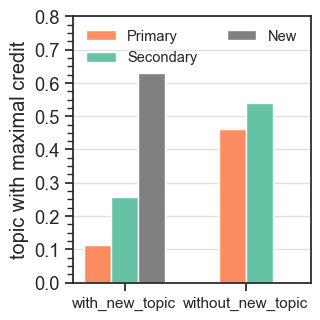

In [50]:
classes = ['with_new_topic','without_new_topic']
width = 0.3  # the width of the bars: can also be len(x) sequence

#figure layout set
fig, ax = plt.subplots(1,1,constrained_layout=True,figsize=[0.618*5,0.618*5])
sns.set(style='ticks',font_scale=1.2, font='Arial')

#plot
x_main = np.array([1,1+5*width])
y_main0 = np.array(type_max_count_with_new['ratio'][type_max_count_with_new['type with max credit']=='main'])[0]
y_main1 = np.array(type_max_count_without_new['ratio'][type_max_count_without_new['type with max credit']=='main'])[0]
ax.bar(x_main, [y_main0,y_main1], width,color=type_colors['main'],label='Primary')

x_associate = np.array([1+width,1+6*width])
# y_associate = np.array(type_max_count['ratio'][type_max_count['type with max credit']=='associate'])
y_associate0 = np.array(type_max_count_with_new['ratio'][type_max_count_with_new['type with max credit']=='associate'])[0]
y_associate1 = np.array(type_max_count_without_new['ratio'][type_max_count_without_new['type with max credit']=='associate'])[0]
ax.bar(x_associate, [y_associate0,y_associate1], width,color=type_colors['asso'],label='Secondary')

x_new = np.array([1+2*width,1+7*width])
y_new0 = np.array(type_max_count_with_new['ratio'][type_max_count_with_new['type with max credit']=='new'])[0]
y_new1 = np.array(0)
ax.bar(x_new, [y_new0,y_new1], width,color=type_colors['new'],label='New')

#fig ticks set
ax.legend(frameon=0,ncol=2,loc='upper left',fontsize=10.5)
ax.set_ylim([0,0.8])
ax.yaxis.set_major_locator(MultipleLocator(0.1))
ax.yaxis.set_minor_locator(MultipleLocator(0.025))
plt.grid(axis='y',alpha=0.6)
ax.set_ylabel('topic with maximal credit')
ax.set_xticks([1+width,1+5.5*width], classes,fontsize=11)
# ax.set_title(f'All')
# fig.savefig('result_data_plot/new_plot(202403)/All (topic with maximal credit).pdf')
plt.show()

#### High impact

In [51]:
q10,q25,q50,q75,q95 = key_data['total_cits5_mte'].drop_duplicates().quantile([.1,.25,.5,.75,.95])
elites = key_data[['mentee_id','mentor_id','credit_mte','type']][(key_data.total_cits5_mte>=q95)]
                                             # &(key_data.total_credit_mte>=key_data.total_credit_mto)]

In [52]:
with_new = elites[['mentee_id','mentor_id']][elites.type=='new'].drop_duplicates()
with_all = elites[['mentee_id','mentor_id']]

with_all_tuple = set([tuple(k) for k in with_all.values]) 
with_new_tuple = set([tuple(k) for k in with_new.values])
without_new = pd.DataFrame(list(with_all_tuple - with_new_tuple),columns=['mentee_id','mentor_id'])

In [53]:
with_new_all = with_new.merge(elites,on=['mentee_id','mentor_id'],how='left')
without_new_all = without_new.merge(elites,on=['mentee_id','mentor_id'],how='left')

In [54]:
type_max = with_new_all.groupby(['mentee_id','mentor_id']).apply(find_max).reset_index(name='type with max credit')
type_max_count = type_max.groupby('type with max credit').size().reset_index(name='Count')
type_max_count['ratio'] = type_max_count['Count']/len(type_max)
type_max_count_with_new = type_max_count

In [55]:
type_max = without_new_all.groupby(['mentee_id','mentor_id']).apply(find_max).reset_index(name='type with max credit')
type_max_count = type_max.groupby('type with max credit').size().reset_index(name='Count')
type_max_count['ratio'] = type_max_count['Count']/len(type_max)
type_max_count_without_new = type_max_count

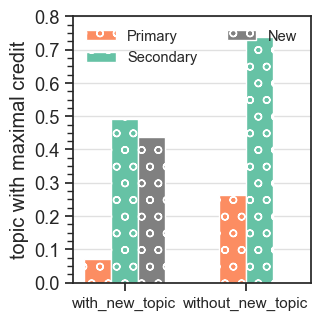

In [56]:
classes = ['with_new_topic','without_new_topic']
width = 0.3  # the width of the bars: can also be len(x) sequence

#figure layout set
fig, ax = plt.subplots(1,1,constrained_layout=True,figsize=[0.618*5,0.618*5])
sns.set(style='ticks',font_scale=1.2, font='Arial')

#plot
x_main = np.array([1,1+5*width])
y_main0 = np.array(type_max_count_with_new['ratio'][type_max_count_with_new['type with max credit']=='main'])[0]
y_main1 = np.array(type_max_count_without_new['ratio'][type_max_count_without_new['type with max credit']=='main'])[0]
ax.bar(x_main, [y_main0,y_main1], width,color=type_colors['main'],label='Primary',hatch='o')

x_associate = np.array([1+width,1+6*width])
# y_associate = np.array(type_max_count['ratio'][type_max_count['type with max credit']=='associate'])
y_associate0 = np.array(type_max_count_with_new['ratio'][type_max_count_with_new['type with max credit']=='associate'])[0]
y_associate1 = np.array(type_max_count_without_new['ratio'][type_max_count_without_new['type with max credit']=='associate'])[0]
ax.bar(x_associate, [y_associate0,y_associate1], width,color=type_colors['asso'],label='Secondary',hatch='o')

x_new = np.array([1+2*width,1+7*width])
y_new0 = np.array(type_max_count_with_new['ratio'][type_max_count_with_new['type with max credit']=='new'])[0]
y_new1 = np.array(0)
ax.bar(x_new, [y_new0,y_new1], width,color=type_colors['new'],label='New',hatch='o')

#fig ticks set
ax.legend(frameon=0,ncol=2,loc='upper left',fontsize=10.5)
ax.set_ylim([0,0.8])
ax.yaxis.set_major_locator(MultipleLocator(0.1))
ax.yaxis.set_minor_locator(MultipleLocator(0.025))
plt.grid(axis='y',alpha=0.6)
ax.set_ylabel('topic with maximal credit')
ax.set_xticks([1+width,1+5.5*width], classes,fontsize=11)
# ax.set_title(f'High-impact Surpasser')
# fig.savefig('result_data_plot/new_plot(202403)/High-impact(topic with maximal credit).pdf')
plt.show()